# Avance 1. Análisis exploratorio de datos
# Clasificación de Texto para Requerimientos Aeroespaciales

<table>
    <tr>
        <th>
            Nombre
        </th>
        <th>
            Matrícula
        </th>
    </tr>
    <tr>
        <td>
            Julio César Lynn Jiménez
        </td>
        <td>
            A01793660
        </td>
    </tr>
</table>	

	


## Carga del conjunto de datos

In [4]:
import pandas as pd
df = pd.read_excel('./DATASETS/1_master.xlsx')
df.head()

,Type,Identity,Text,A2-Unambiguous,A4-Tolerances,A5-Sources specified,E1
0,ast_adc,HLRS_1747,Massive Data Broadcast shall immediately send ...,1,na,1,1
1,ast_adc,HLRS_6673,Massive Data Broadcast shall place a copied Re...,1,na,1,1
2,ast_adc,HLRS_2470,Massive Data Broadcast shall place a copied Ma...,1,na,1,1
3,ast_adc,HLRS_2467,Massive Data Broadcast shall send the current ...,1,na,na,1
4,ast_adc,HLRS_2468,Massive Data Broadcast shall send the current ...,1,na,na,1


## Visualización para el análisis de datos

### Nubes de palabras

In [55]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

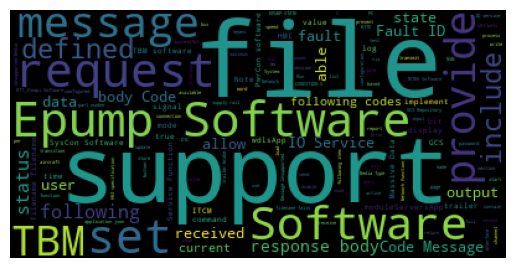

In [56]:

# Se crea la instancia para generar la nube de palabras
corpus = " ".join(df["Text"])
wc = WordCloud().generate_from_text(corpus)

# Se utliza matplotlib para crear la visualización
plt.imshow(wc)
plt.axis('off')
plt.show()

In [57]:
model_df_label1 = df.query('E1 == 1')
len(model_df_label1)

2408

In [82]:
len(model_df_label1) / docs_len

0.8975027953783079

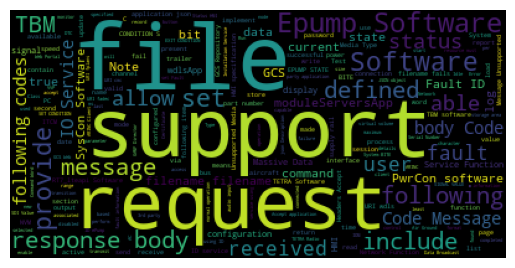

In [59]:
# Se recrean los pasos anteriores con subconjunto de la clase que representa a los requerimientos verificables
corpus_label1 = " ".join(model_df_label1["Text"])
wc = WordCloud().generate_from_text(corpus_label1)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [60]:
model_df_label0 = df.query('E1 == 0')
len(model_df_label0)

275

In [83]:
len(model_df_label0) / docs_len

0.10249720462169214

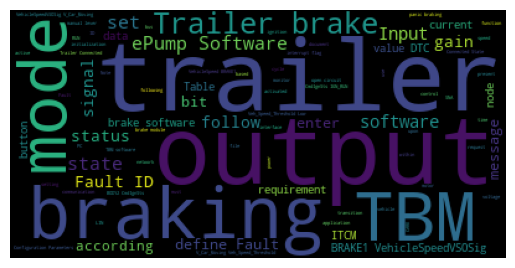

In [61]:
# Se recrean los pasos anteriores con subconjunto de la clase que representa a los requerimientos no verificables
corpus_label0 = " ".join(model_df_label0["Text"])
wc = WordCloud().generate_from_text(corpus_label0)

plt.imshow(wc)
plt.axis('off')
plt.show()

Ya que se encuentran palabras presentes sobre representadas en ambas clases, se define una lista de stop words para hacer un análisis mas profundo.

In [62]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
nltk_words = stopwords.words('english')


cloud_stopwords = [*nltk_words, 'support', 'software', 'request', 'file', 'system', 'john', 'shall', 'data', 'fault', 'trailer','break','service']

In [84]:
# Se definie una función para generar las nubes de palabras
def generate_wordcloud(data, title):
    cloud = WordCloud(
                      max_words=150,
                      # colormap='tab20c',
                      stopwords=cloud_stopwords,
                      collocations=False).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.show()

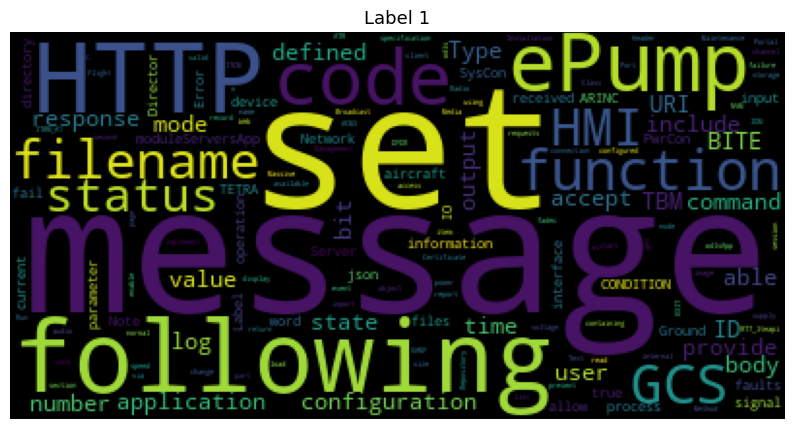

In [85]:
# Se genera la nube de palabras para los requerimientos verificables
generate_wordcloud(" ".join(model_df_label1["Text"]), 'Label 1')

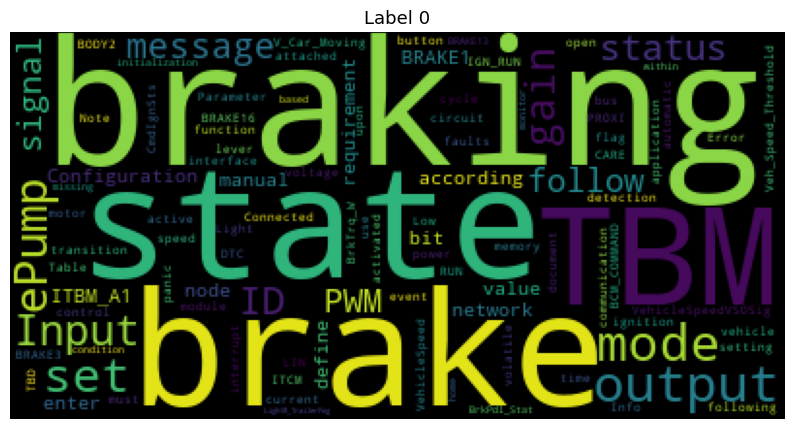

In [86]:
# Se genera la nube de palabras para los requerimientos no verificables
generate_wordcloud(" ".join(model_df_label0["Text"]), 'Label 0')

### Gráficas de líneas

In [67]:
import nltk
from nltk.probability import FreqDist

In [68]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\julio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
tokenizer = RegexpTokenizer(r'\w+')

fdist = FreqDist()
for sentence in sent_tokenize(corpus.lower()):
    for word in tokenizer.tokenize(sentence):
        if word not in cloud_stopwords:
            fdist[word] += 1


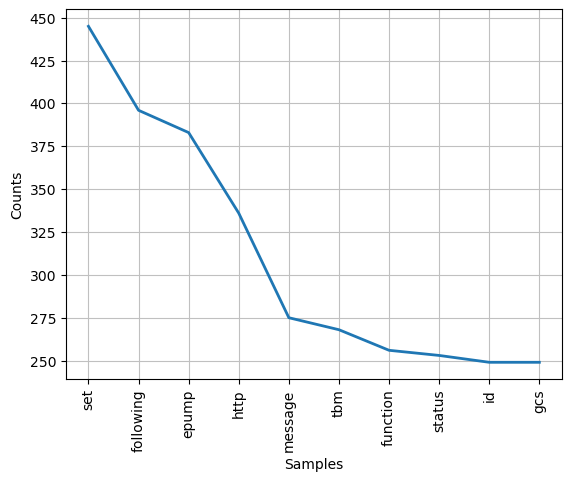

In [70]:
fdist.plot(10, cumulative=False)
plt.show()

In [71]:
fdist_label1 = FreqDist()
for sentence in sent_tokenize(corpus_label1.lower()):
    for word in tokenizer.tokenize(sentence):
        if word not in cloud_stopwords:
            fdist_label1[word] += 1

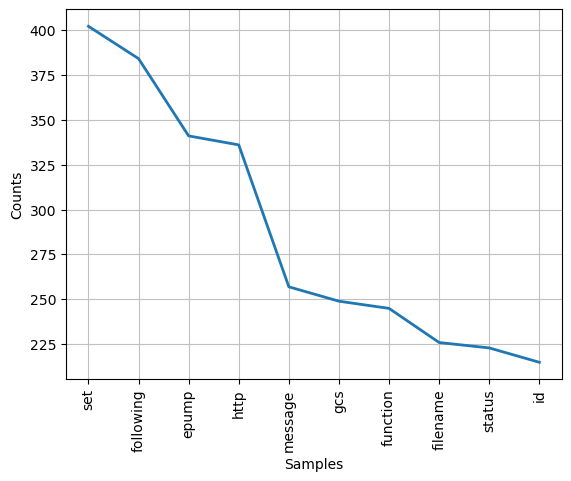

In [72]:
fdist_label1.plot(10, cumulative=False)
plt.show()

In [73]:
fdist_label0 = FreqDist()
for sentence in sent_tokenize(corpus_label0.lower()):
    for word in tokenizer.tokenize(sentence):
        if word not in cloud_stopwords:
            fdist_label0[word] += 1

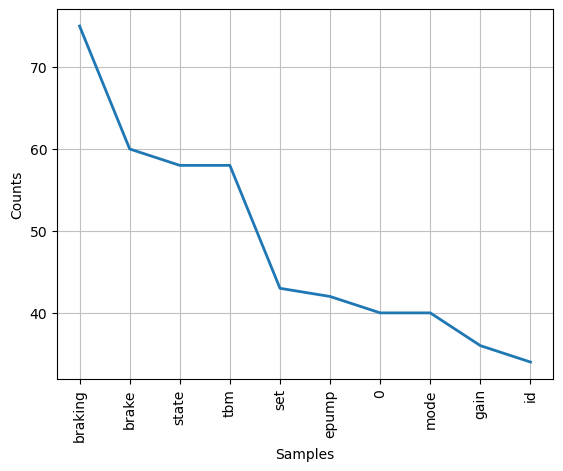

In [74]:
fdist_label0.plot(10, cumulative=False)
plt.show()

## Estadísticas resumidas

Cantidad de palabras en el vocabulario.

In [75]:
vocab_len = len(fdist.keys())
vocab_len

4079

Cantidad de documentos en el corpus

In [76]:
docs_len = len(df["Text"])
docs_len

2683

In [77]:
df_len = df["Text"].apply(lambda x: len(x.split(" ")))
df_len

0       17
1       64
2       76
3       72
4       73
        ..
2678    14
2679    16
2680    11
2681    17
2682     6
Name: Text, Length: 2683, dtype: int64

Longitud media de palabras por documento.

In [78]:
len_avg = sum(df_len) / docs_len
len_avg

25.9951546775997

In [79]:
max(df_len)

464

In [80]:
min(df_len)

2

<Axes: xlabel='Text'>

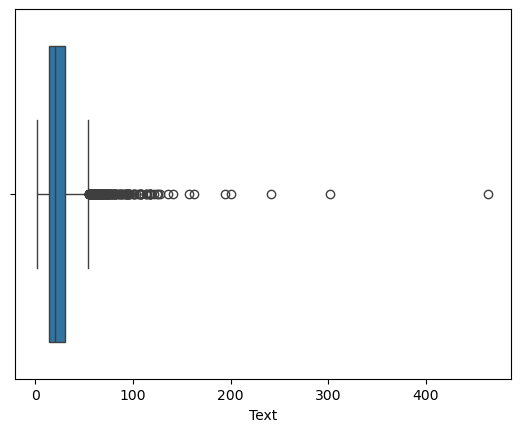

In [81]:
import seaborn as sns

sns.boxplot(x=df_len)

## K-Means

In [18]:
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
vectorizer = TfidfVectorizer(stop_words='english')

In [5]:
vectorized_documents = vectorizer.fit_transform(df["Text"]) 

In [6]:
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(vectorized_documents.toarray()) 

In [26]:
reduced_data

array([[-0.02514614, -0.05797304],
       [-0.03322497, -0.06951945],
       [-0.03216799, -0.07045261],
       ...,
       [-0.02288678, -0.0870587 ],
       [ 0.02369302, -0.04665982],
       [-0.02785491, -0.05408248]])

In [7]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5, 
                max_iter=500, random_state=42) 
kmeans.fit(vectorized_documents) 

KMeans(max_iter=500, n_clusters=2, n_init=5, random_state=42)

In [ ]:
results = pd.DataFrame() 
results['document'] = df["Text"] 
results['cluster'] = kmeans.labels_ 
results['label'] = df["E1"] 

results['reduced_x'] = 0
results['reduced_y'] = 0
for i in range(len(reduced_data)):
    results['reduced_x'][i] = reduced_data[i][0]
    results['reduced_y'][i] = reduced_data[i][1]

In [30]:
print(results.sample(5)) 

                                               document  cluster  label  \
853   The PwrCon software shall allow for enabling t...        0      1   
381   VVP shall implement a virtual volume API funct...        0      1   
1005  The software shall provide a visual warning wh...        0      1   
894   The PwrCon software shall accept a command to ...        0      1   
1065  The ePump Software shall be validated to confo...        0      0   

      reduced_x  reduced_y  
853   -0.064192  -0.035620  
381   -0.019493  -0.094632  
1005  -0.040832  -0.049412  
894   -0.052786  -0.023427  
1065  -0.050461   0.046799  


<Axes: xlabel='reduced_x', ylabel='reduced_y'>

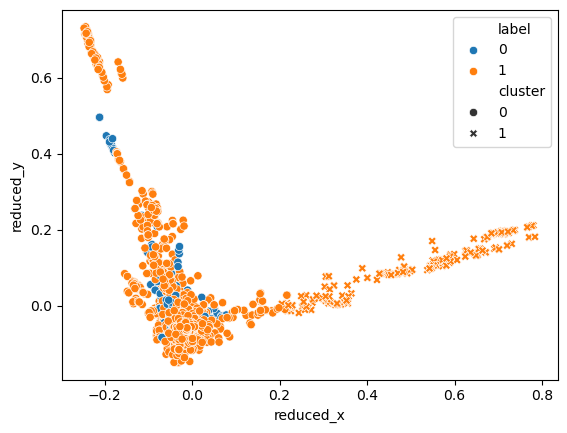

In [34]:
sns.scatterplot(results, x="reduced_x", y="reduced_y", hue="label", style="cluster")